#Function and Models

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import numpy as np
import pandas as pd
import string
import os

number=0
areas=["Science Survey"]

#Make Directory For Child-Level
if os.path.exists(f'/content/drive/MyDrive/{areas[number]}') == False:
  os.mkdir(f'/content/drive/MyDrive/{areas[number]}')

data=pd.read_csv(f"/content/drive/MyDrive/{areas[number]}.csv")
data.head() #show the head of the dataset

,Domain,area,parent_classes_1,parent_values_1,childp_classes_1,child_values_1,child_classes_2,child_values_2,parent_classes_2,parent_values_2,child_classes_1,childp_values_1,child_classes_2.1,child_values_2.1,fields
0,biochemistry,Genetics,biochemistry,97%,Molecular biology,1%,Genetics,98%,Medical,2%,Addiction,4%,Diabetes,5%,"['Statistical Genetics', 'Genetic Epidemiology..."
1,biochemistry,Genetics,biochemistry,33%,Cell biology,13%,Genetics,15%,Medical,30%,Cancer,3%,Diabetes,3%,['pancreas and biliary']
2,Medical,Cancer,Medical,97%,Addiction,3%,Cancer,4%,biochemistry,2%,Immunology,14%,Genetics,14%,['cancer']
3,biochemistry,Enzymology,biochemistry,39%,Genetics,8%,Enzymology,51%,MAE,2%,Materials Engineering,18%,Thermodynamics,18%,"['Physical Chemistry', 'Theoretical Chemistry'..."
4,Medical,Medicare,Medical,33%,Addiction,3%,Medicare,3%,MAE,30%,Manufacturing engineering,13%,Fluid mechanics,15%,['Circadian Rhythms in Heart Ischemia and Acut...


In [39]:
pip install keras-tuner --upgrade

In [40]:
#SKLEARN LINRARIES
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split,KFold

#NLTK LIBRARIES
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize,RegexpTokenizer
nltk.download('stopwords')
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
stop_words=stopwords.words("english")
from nltk.stem import PorterStemmer

from bs4 import BeautifulSoup
from IPython.display import clear_output
import numpy as np
import pandas as pd
import string
from matplotlib import pyplot as plt
from collections import Counter

#Tokenizing
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

def Progress(string):
    global iterator
    global number_of_records
    percent=((iterator/number_of_records)*10)

    if percent%5==0:
        clear_output(wait=True)
        print(string+":"+str(percent)+"%")

    iterator=iterator+1

def remove_strip(text):
    return text.strip()

def remove_noise(text):


    soup=BeautifulSoup(text,"html.parser")
    text=soup.get_text()
    return text

def remove_punc(text):


    rem_punc=RegexpTokenizer(r'\w+')
    return ' '.join(rem_punc.tokenize(text))

def remove_stopwords(text):


    words=word_tokenize(text)
    return ' '.join([w.lower() for w in words if not w.lower() in stop_words])

def stemming(text):


    words=word_tokenize(text)
    porter=PorterStemmer()
    return ' '.join([porter.stem(w) for w in words ])



def Vocab(text):
  global freqdist
  words=word_tokenize(text)
  vocab.update(nltk.FreqDist(words).keys())

def build_vocab(documents):

  #maing vocab
  documents.apply(Vocab)

  return vocab

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [41]:
# define the model
import keras
from keras.models import Sequential
from keras.models import Model
import numpy as np
from keras.layers import Dense, Input, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding, Dropout, LSTM, GRU, Bidirectional,SimpleRNN
from keras.optimizers import Adam,RMSprop
import keras_tuner as kt
import tensorflow as tf
from keras.metrics import Accuracy,Precision,Recall,F1Score

# define the model
class CNN(kt.HyperModel):
  def __init__(self,wv,complexity,max_length,nClasses):
    self.wv=wv
    self.complexity=complexity
    self.max_length=max_length
    self.nClasses=nClasses

  def build(self,hp):
    model=Sequential()
    model.add(Embedding(input_dim=(self.wv.shape[0]),
                            output_dim=(self.wv.shape[1]),
                            weights=[self.wv],
                            input_length=self.max_length,
                            trainable=False))
    if self.complexity==0:

      if(self.wv.shape[1]>60):
        for j in range(0,hp.Int("Testing number of Conv and maxpolling layer", min_value=2, max_value=2, step=1)):
          model.add(Conv1D(512,hp.Choice("Testing the kernel size of conv",[3,5]), activation="relu"))
          model.add(MaxPooling1D(hp.Choice("Testing the kernel size of conv",[3,5])))
      else:
        for j in range(0,hp.Int("Testing number of Conv and maxpolling layer", min_value=1, max_value=1, step=1)):
          model.add(Conv1D(512,hp.Choice("Testing the kernel size of conv",[3,4,5]), activation="relu"))
          model.add(MaxPooling1D(hp.Choice("Testing the kernel size of conv",[3,4,5])))
      model.add(Flatten())


      for j in range(0,hp.Int("Testing number of Desnse Layer", min_value=2, max_value=2, step=1)):
        model.add(Dense(hp.Int("Testing number of nuerons Desnse Layer", min_value=200, max_value=200, step=100), activation='relu'))
        model.add(Dropout(0.25))

        # for j in range(0,2):
        #   model.add(Conv1D(256,3, activation='relu'))
        #   model.add(MaxPooling1D(3))

        # model.add(Flatten())
        # for j in range(0,3):
        #   model.add(Dense(100))
        # model.add(Dense(self.nClasses, activation='softmax'))
    else:

        filter_sizes = [3, 4, 5, 6, 7]
        for fsz in filter_sizes:
            model.add(Conv1D(128,fsz,activation='relu'))
            model.add(MaxPooling1D(5))

        model.add(Conv1D(128,5, activation='relu'))
        model.add(MaxPooling1D(5))
        model.add(Conv1D(128,5, activation='relu'))
        model.add(MaxPooling1D(30))

        model.add(Flatten())
        model.add(Dense(128, activation='relu'))
        model.add(Dense(self.nClasses, activation='softmax'))

    model.add(Dense(self.nClasses, activation='softmax'))
    model.compile(optimizer=RMSprop(learning_rate=0.001),loss=["categorical_crossentropy"],metrics=["accuracy",Precision(name="precision"),Recall(name="recall")])
    return model

class RNN(kt.HyperModel):
  def __init__(self,wv,complexity,max_length,nClasses):
    self.wv=wv
    self.complexity=complexity
    self.max_length=max_length
    self.nClasses=nClasses

  def build(self,hp):
    model = Sequential()
    model.add(Embedding(input_dim=(self.wv.shape[0]),
                        output_dim=(self.wv.shape[1]),
                        weights=[self.wv],
                        input_length=self.max_length,
                        trainable=False))

    model.add(GRU(hp.Int("Testing number of nuerons Desnse Layer", min_value=20, max_value=100, step=20)))
    model.add(Dense(self.nClasses, activation='softmax'))
    model.compile(optimizer=RMSprop(learning_rate=0.001),loss=["categorical_crossentropy"],metrics=["accuracy",Precision(name="precision"),Recall(name="recall")])
    return model



class DNN(kt.HyperModel):
  def __init__(self,Shape,nClasses,nLayers=3,Number_Node=100, dropout=0.5):
    self.Shape=Shape
    self.nLayers=nLayers
    self.Number_Node=Number_Node
    self.nClasses=nClasses
    self.dropout=dropout

  def build(self,hp):
    model = Sequential()
    model.add(Dense(hp.Int("Testing number of nuerons Desnse Layer", min_value=100, max_value=400, step=100), input_shape=(self.Shape,)))
    model.add(Dropout(self.dropout))

    for i in range(0,hp.Int("Testing number of Desnse Layer", min_value=1, max_value=3, step=1)):
        model.add(Dense(hp.Int("Testing number of nuerons Desnse Layer", min_value=100, max_value=400, step=100), activation='relu'))
        model.add(Dropout(self.dropout))

    model.add(Dense(self.nClasses, activation='softmax'))
    model.compile(loss='categorical_crossentropy',metrics=["accuracy",Precision(name="precision"),Recall(name="recall")],optimizer='adam')
    return model
    return model

In [42]:
data.tail() #show the end of the dataset

,Domain,area,parent_classes_1,parent_values_1,childp_classes_1,child_values_1,child_classes_2,child_values_2,parent_classes_2,parent_values_2,child_classes_1,childp_values_1,child_classes_2.1,child_values_2.1,fields
85279,Medical,Birth Control,Medical,33%,Atopic Dermatitis,3%,Birth Control,3%,biochemistry,19%,Molecular biology,10%,Immunology,35%,"['Veterinary Pathology', 'Veterinary Medicine'..."
85280,MAE,Manufacturing engineering,MAE,79%,Fluid mechanics,14%,Manufacturing engineering,14%,biochemistry,20%,Enzymology,11%,Human Metabolism,21%,['Human anatomy']
85281,Civil,Ambient Intelligence,Civil,39%,Construction Management,9%,Ambient Intelligence,21%,CS,18%,Computer programming,7%,Parallel computing,8%,"['Mobile Robotics', 'UAV', 'Intelligent Contol..."
85282,biochemistry,Genetics,biochemistry,40%,Molecular biology,12%,Genetics,64%,Medical,18%,Autism,3%,Diabetes,4%,"['Genetic engineering', 'Biotehnology', 'Plant..."
85283,Medical,Mental Health,Medical,55%,Cancer,3%,Mental Health,3%,Psychology,24%,Problem-solving,7%,Leadership,7%,"['Managerial economics', 'Microeconomics', 'Be..."


In [43]:
data.columns

Index(['Domain', 'area', 'parent_classes_1', 'parent_values_1',
       'childp_classes_1', 'child_values_1', 'child_classes_2',
       'child_values_2', 'parent_classes_2', 'parent_values_2',
       'child_classes_1', 'childp_values_1', 'child_classes_2.1',
       'child_values_2.1', 'fields'],
      dtype='object')

In [44]:
data.shape

(85284, 15)

In [45]:
data.describe()

,Domain,area,parent_classes_1,parent_values_1,childp_classes_1,child_values_1,child_classes_2,child_values_2,parent_classes_2,parent_values_2,child_classes_1,childp_values_1,child_classes_2.1,child_values_2.1,fields
count,85284,85284,85284,85284,85284,85284,85284,85284,85284,85284,85284,85284,85284,85284,85284
unique,7,134,7,83,134,48,134,99,7,50,135,36,135,97,76635
top,biochemistry,Immunology,biochemistry,39%,Genetics,13%,Immunology,15%,Civil,18%,Smart Material,8%,Ambient Intelligence,9%,['Chemistry']
freq,29951,16010,29951,11027,14256,15880,16010,12347,19589,12400,8511,16379,10467,11424,144


In [46]:
data.isnull().any() #checking the dataset have null values

Domain               False
area                 False
parent_classes_1     False
parent_values_1      False
childp_classes_1     False
child_values_1       False
child_classes_2      False
child_values_2       False
parent_classes_2     False
parent_values_2      False
child_classes_1      False
childp_values_1      False
child_classes_2.1    False
child_values_2.1     False
fields               False
dtype: bool

In [47]:
data.isnull().sum() #checking number of null values

Domain               0
area                 0
parent_classes_1     0
parent_values_1      0
childp_classes_1     0
child_values_1       0
child_classes_2      0
child_values_2       0
parent_classes_2     0
parent_values_2      0
child_classes_1      0
childp_values_1      0
child_classes_2.1    0
child_values_2.1     0
fields               0
dtype: int64

In [48]:
data['Domain'].value_counts() # check the vlaues for each columns

biochemistry    29951
Medical         14872
Civil           11064
CS              10978
MAE             10922
Psychology       4305
ECE              3192
Name: Domain, dtype: int64

In [49]:
!pip install imbalanced-learn

In [50]:
data=data.loc[:,["fields","Domain"]]
data

,fields,Domain
0,"['Statistical Genetics', 'Genetic Epidemiology...",biochemistry
1,['pancreas and biliary'],biochemistry
2,['cancer'],Medical
3,"['Physical Chemistry', 'Theoretical Chemistry'...",biochemistry
4,['Circadian Rhythms in Heart Ischemia and Acut...,Medical
...,...,...
85279,"['Veterinary Pathology', 'Veterinary Medicine'...",Medical
85280,['Human anatomy'],MAE
85281,"['Mobile Robotics', 'UAV', 'Intelligent Contol...",Civil
85282,"['Genetic engineering', 'Biotehnology', 'Plant...",biochemistry


#Preprocessing


In [51]:
#before preprocessing
print("------------------------------------------------")
print(data["fields"][0])
print("------------------------------------------------")

#removeing puctuation
iterator=1
data['fields']=data['fields'].apply(remove_punc)

#removeing stopwords
iterator=1
data['fields']=data['fields'].apply(remove_stopwords)

#after preprocessing
print("------------------------------------------------")
print(data["fields"][0])
print("------------------------------------------------")

------------------------------------------------
['Statistical Genetics', 'Genetic Epidemiology', 'Genetics of Gene Expression', 'Variance Components Methods in Genetics', 'Multivariate L']
------------------------------------------------
------------------------------------------------
statistical genetics genetic epidemiology genetics gene expression variance components methods genetics multivariate l
------------------------------------------------


#Tokenizer

In [52]:
#number of distince frequency in dataset
print('--------------------------------------------------------------------------------------------------------')
vocab=Counter()
freqdist=len(build_vocab(data["fields"]))
print("Number Frequency "+str(freqdist))
print('--------------------------------------------------------------------------------------------------------')

# Tokenize our training data
print('--------------------------------------------------------------------------------------------------------')
print("Tokenizing...")
tokenizer = Tokenizer(freqdist-200)
tokenizer.fit_on_texts(data['fields'])
# Encode training data sentences into sequences
sequences = tokenizer.texts_to_sequences(data['fields'],)

# Get our training data word index
word_to_index = tokenizer.word_index

# Get max training sequence length
maxlen = max([len(x) for x in sequences])

#Pad the training sequences
sequences_padded = pad_sequences(sequences,maxlen=maxlen)

# Output the results of our work
print("Word index:\n",len(word_to_index))
print("\nSequences:", sequences[0])
print("\nSequences Length:", len(sequences[0]))
print("\nPadded Sequences:", sequences_padded[0])
print("\nPadded Sequences Length:", len(sequences_padded[0]))
print('--------------------------------------------------------------------------------------------------------')

--------------------------------------------------------------------------------------------------------
Number Frequency 34674
--------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------
Tokenizing...
Word index:
 34629

Sequences: [178, 36, 349, 65, 36, 307, 788, 11036, 2797, 116, 36, 1414, 1071]

Sequences Length: 13

Padded Sequences: [    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0   178    36   349    65
    36   307   788 11036  2797   116    36  1414  1071]

Padded Sequences Length: 33
--------------------------------------------------------------------------------------------------------


In [53]:
print(data["fields"][13])
print(word_to_index["primary"])
print(sequences_padded[13])

biostatistics primary care research
951
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0 344 951 199  38]


In [54]:
np.savetxt('/content/drive/MyDrive/sequences_padded_science_survey.txt',sequences_padded,fmt='%i')

#Word_Embedding

In [55]:
from gensim.models import KeyedVectors

words_embeddings={}

# # #GloVe 50d
# words_embeddings["glove.50d"]=KeyedVectors.load_word2vec_format("/content/drive/MyDrive/glove.50d.txt",binary=False)
# # GloVe 100d
# words_embeddings["glove.100d"]=KeyedVectors.load_word2vec_format("/content/drive/MyDrive/glove.100d.txt",binary=False)
# # #GloVe 200d
# words_embeddings["glove.200d"]=KeyedVectors.load_word2vec_format("/content/drive/MyDrive/glove.200d.txt",binary=False)
# # #GloVe 300d
# words_embeddings["glove.300d"]=KeyedVectors.load_word2vec_format("/content/drive/MyDrive/glove.300d.txt",binary=False)
#GoogleNews-vectors
words_embeddings["GoogleNews-vectors"]=KeyedVectors.load_word2vec_format("/content/drive/MyDrive/GoogleNews-vectors-negative300.bin",binary=True)

In [56]:
words_embeddings_matrix={}
for key,wv in words_embeddings.items():
  vocab=len(word_to_index)
  vocab_word_embedding=wv.key_to_index.keys()

  emb_matrix=np.zeros((vocab,len(wv.get_vector("computer"))))
  # emb_matrix=np.random.random((vocab,len(wv.get_vector("computer"))))
  emb_dict={}
  not_existing_words=[]

  for word,index in word_to_index.items():
    if word in vocab_word_embedding:
      if index==len(word_to_index.keys()):
        continue
      emb_dict[word]=wv.get_vector(word)
      emb_matrix[index, :]=wv.get_vector(word)
    else:
      not_existing_words.append(word)

  words_embeddings_matrix[key]=emb_matrix
  print("Not Existing Word:",not_existing_words[1])
  print("\n\nNumber Of Not Existing Word:",len(not_existing_words))
  print("\n\nVector Of Existing Word good:",emb_dict["good"])
  print("\n\nEmbeding Matrix shape",emb_matrix.shape)



  del not_existing_words
  del emb_dict
  del emb_matrix


Not Existing Word: química


Number Of Not Existing Word: 19850


Vector Of Existing Word good: [ 0.04052734  0.0625     -0.01745605  0.07861328  0.03271484 -0.01263428
  0.00964355  0.12353516 -0.02148438  0.15234375 -0.05834961 -0.10644531
  0.02124023  0.13574219 -0.13183594  0.17675781  0.27148438  0.13769531
 -0.17382812 -0.14160156 -0.03076172  0.19628906 -0.03295898  0.125
  0.25390625  0.12695312 -0.15234375  0.03198242  0.01135254 -0.01361084
 -0.12890625  0.01019287  0.23925781 -0.08447266  0.140625    0.13085938
 -0.04516602  0.06494141  0.02539062  0.05615234  0.24609375 -0.20507812
  0.23632812 -0.00860596 -0.02294922  0.05078125  0.10644531 -0.03564453
  0.08740234 -0.05712891  0.08496094  0.23535156 -0.10107422 -0.03564453
 -0.04736328  0.04736328 -0.14550781 -0.10986328  0.14746094 -0.23242188
 -0.07275391  0.19628906 -0.37890625 -0.07226562  0.04833984  0.11914062
  0.06103516 -0.12109375 -0.27929688  0.05200195  0.04907227 -0.02709961
  0.1328125   0.03369141 -0.32226

In [57]:
for key,wv in words_embeddings_matrix.items():
  np.savetxt(f'/content/drive/MyDrive/words_embeddings_matrix_science_survey/{key}_matrix.txt', wv, fmt='%f64')

#Model

In [ ]:
from sklearn.preprocessing import LabelBinarizer

label=LabelBinarizer()
data_multi_class=label.fit_transform(data["Domain"])
print(data_multi_class.shape)

(85284, 7)


In [ ]:
Excel_Output=pd.DataFrame(columns=["Classifier","Embedding","Dimension_Size"])

#RNN MODEL

Reloading Tuner from ./untitled_project/tuner0.json
Search space summary
Default search space size: 1
Testing number of nuerons Desnse Layer (Int)
{'default': None, 'conditions': [], 'min_value': 20, 'max_value': 100, 'step': 20, 'sampling': 'linear'}
Epoch 1/13
500/500 [==============================] - 7s 11ms/step - loss: 0.6537 - accuracy: 0.7663 - precision: 0.8428 - recall: 0.6752 - val_loss: 0.4934 - val_accuracy: 0.8212 - val_precision: 0.8625 - val_recall: 0.7723
Epoch 2/13
500/500 [==============================] - 4s 8ms/step - loss: 0.3886 - accuracy: 0.8541 - precision: 0.8825 - recall: 0.8246 - val_loss: 0.3484 - val_accuracy: 0.8697 - val_precision: 0.8952 - val_recall: 0.8438
Epoch 3/13
500/500 [==============================] - 3s 6ms/step - loss: 0.3141 - accuracy: 0.8813 - precision: 0.9031 - recall: 0.8604 - val_loss: 0.3087 - val_accuracy: 0.8842 - val_precision: 0.9039 - val_recall: 0.8667
Epoch 4/13
500/500 [==============================] - 3s 7ms/step - loss: 0

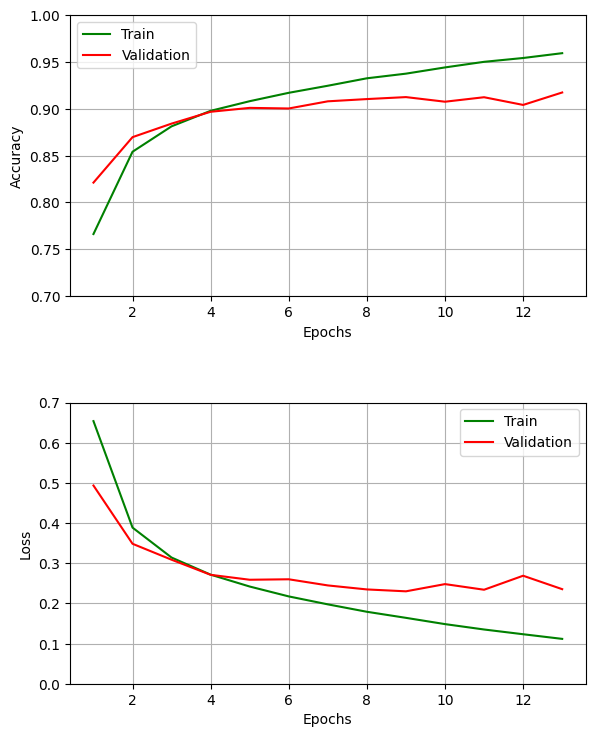

Reloading Tuner from ./untitled_project/tuner0.json
Search space summary
Default search space size: 1
Testing number of nuerons Desnse Layer (Int)
{'default': None, 'conditions': [], 'min_value': 20, 'max_value': 100, 'step': 20, 'sampling': 'linear'}
Epoch 1/13
500/500 [==============================] - 7s 10ms/step - loss: 0.6623 - accuracy: 0.7601 - precision: 0.8425 - recall: 0.6688 - val_loss: 0.4646 - val_accuracy: 0.8264 - val_precision: 0.8612 - val_recall: 0.7896
Epoch 2/13
500/500 [==============================] - 4s 7ms/step - loss: 0.3878 - accuracy: 0.8560 - precision: 0.8841 - recall: 0.8272 - val_loss: 0.3646 - val_accuracy: 0.8637 - val_precision: 0.8878 - val_recall: 0.8368
Epoch 3/13
500/500 [==============================] - 5s 10ms/step - loss: 0.3136 - accuracy: 0.8823 - precision: 0.9029 - recall: 0.8615 - val_loss: 0.3112 - val_accuracy: 0.8822 - val_precision: 0.9016 - val_recall: 0.8634
Epoch 4/13
500/500 [==============================] - 4s 7ms/step - loss: 

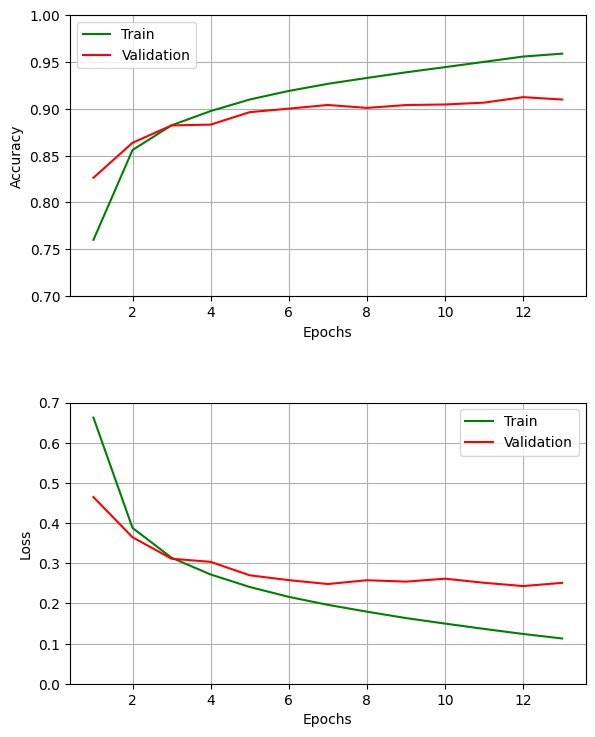

Reloading Tuner from ./untitled_project/tuner0.json
Search space summary
Default search space size: 1
Testing number of nuerons Desnse Layer (Int)
{'default': None, 'conditions': [], 'min_value': 20, 'max_value': 100, 'step': 20, 'sampling': 'linear'}
Epoch 1/13
500/500 [==============================] - 8s 12ms/step - loss: 0.6609 - accuracy: 0.7618 - precision: 0.8410 - recall: 0.6707 - val_loss: 0.5002 - val_accuracy: 0.8179 - val_precision: 0.8595 - val_recall: 0.7724
Epoch 2/13
500/500 [==============================] - 4s 7ms/step - loss: 0.3909 - accuracy: 0.8545 - precision: 0.8834 - recall: 0.8238 - val_loss: 0.3632 - val_accuracy: 0.8645 - val_precision: 0.8908 - val_recall: 0.8363
Epoch 3/13
500/500 [==============================] - 4s 7ms/step - loss: 0.3131 - accuracy: 0.8833 - precision: 0.9045 - recall: 0.8617 - val_loss: 0.3021 - val_accuracy: 0.8840 - val_precision: 0.9045 - val_recall: 0.8624
Epoch 4/13
500/500 [==============================] - 5s 10ms/step - loss: 

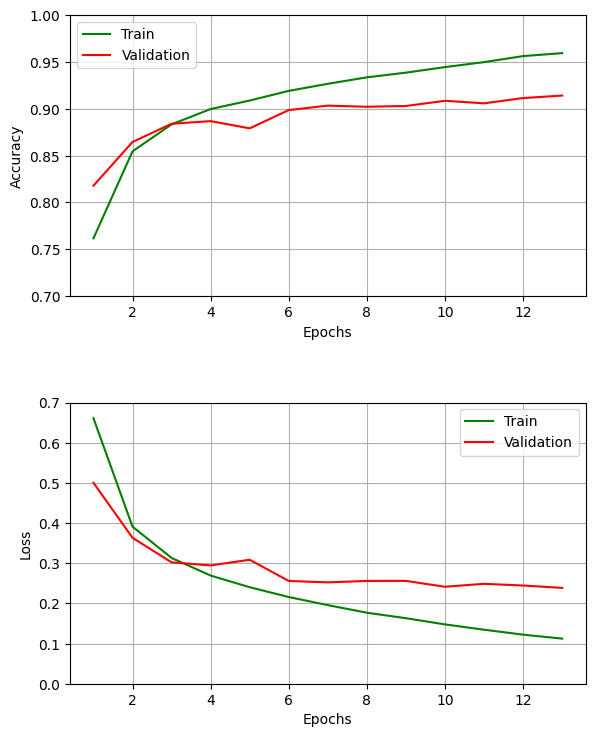

Reloading Tuner from ./untitled_project/tuner0.json
Search space summary
Default search space size: 1
Testing number of nuerons Desnse Layer (Int)
{'default': None, 'conditions': [], 'min_value': 20, 'max_value': 100, 'step': 20, 'sampling': 'linear'}
Epoch 1/13
500/500 [==============================] - 6s 8ms/step - loss: 0.6527 - accuracy: 0.7648 - precision: 0.8419 - recall: 0.6729 - val_loss: 0.4417 - val_accuracy: 0.8366 - val_precision: 0.8683 - val_recall: 0.8015
Epoch 2/13
500/500 [==============================] - 5s 9ms/step - loss: 0.3875 - accuracy: 0.8552 - precision: 0.8829 - recall: 0.8255 - val_loss: 0.3531 - val_accuracy: 0.8665 - val_precision: 0.8896 - val_recall: 0.8441
Epoch 3/13
500/500 [==============================] - 3s 7ms/step - loss: 0.3168 - accuracy: 0.8799 - precision: 0.8998 - recall: 0.8586 - val_loss: 0.3060 - val_accuracy: 0.8842 - val_precision: 0.9061 - val_recall: 0.8651
Epoch 4/13
500/500 [==============================] - 3s 7ms/step - loss: 0.

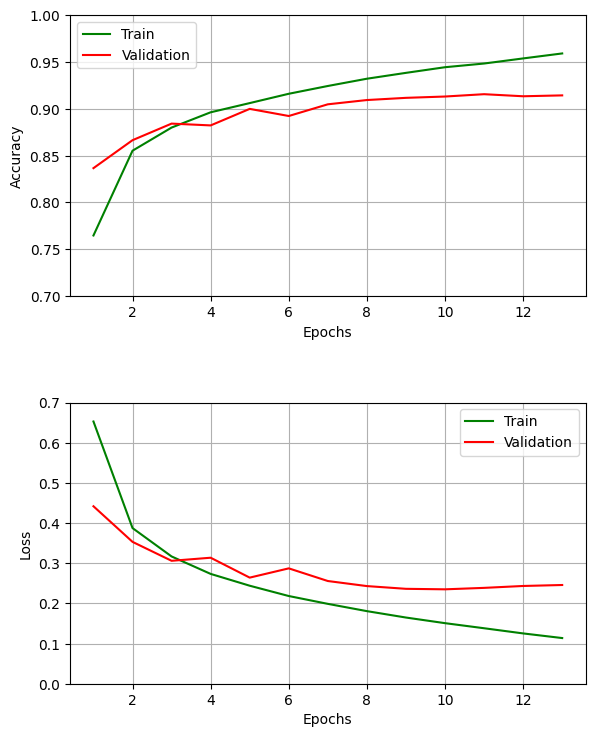

In [ ]:
from sklearn.model_selection import KFold
from matplotlib.ticker import FormatStrFormatter

for key,wv in words_embeddings_matrix.items():
  best_model=None
  best_accuracy=0
  overwrite=True
  #Using KFOLD
  kfold=KFold(n_splits=4,shuffle=True)
  fold=1
  for train,test in kfold.split(sequences_padded,data_multi_class):
    #KFOLD
    #------------------------------------------------------------------------------------------
    x_train=sequences_padded[train]
    x_test=sequences_padded[test]
    y_train=data_multi_class[train]
    y_test=data_multi_class[test]
    #------------------------------------------------------------------------------------------

    #RNN MODEL
    #-------------------------------------------------------------------------------
    rnn=RNN(wv,0,max_length=len(x_train[0]),nClasses=y_train.shape[1])
    tunner=kt.Hyperband(hypermodel=rnn,objective="val_accuracy",overwrite=False,max_epochs=4)
    tunner.search_space_summary()
    tunner.search(x_train, y_train,batch_size=64,epochs=15,validation_data=(x_test,y_test),callbacks=[tf.keras.callbacks.EarlyStopping('val_loss', patience=3)])
    best_hps = tunner.get_best_hyperparameters(num_trials=1)[0]
    model = tunner.hypermodel.build(best_hps)
    history=model.fit(x_train, y_train, batch_size=128,epochs=13,validation_data=(x_test,y_test))
    #-------------------------------------------------------------------------------


    #PLOTING
    #------------------------------------------------------------------------------------------
    epochs_number=len(history.history["accuracy"])+1
    fig,axis=plt.subplots(2,1)

    #Figure Accuracy
    axis[0].plot(range(1,epochs_number),history.history["accuracy"],label="Train",color="green")
    axis[0].plot(range(1,epochs_number),history.history["val_accuracy"],label="Validation",color="red")
    axis[0].set_xlabel('Epochs')
    axis[0].set_ylabel('Accuracy')
    axis[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    axis[0].yaxis.set_ticks(np.arange(round(min(history.history["accuracy"])-0.05,1),round(max(history.history["accuracy"])+0.05,1),0.05))
    #Figure Loss
    axis[1].plot(range(1,epochs_number),history.history["loss"],label="Train",color="green")
    axis[1].plot(range(1,epochs_number),history.history["val_loss"],label="Validation",color="red")
    axis[1].set_xlabel('Epochs')
    axis[1].set_ylabel('Loss')
    axis[1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    axis[1].yaxis.set_ticks(np.arange(round(min(history.history["loss"])-0.1,1),round(max(history.history["loss"])+0.1,1),0.1))

    axis[0].grid()
    axis[1].grid()

    axis[0].legend()
    axis[1].legend()

    fig.tight_layout()
    fig.set_figheight(8)
    fig.set_figwidth(6)

    plt.show()
    fig.savefig(f"/content/drive/MyDrive/{areas[number]}/{areas[number]}_RNN_plot_{key}_{fold}.jpg")
    #------------------------------------------------------------------------------------------


    #Saving Model and Accuracy and Loss
    #------------------------------------------------------------------------------------------
    accuracy_text=' '.join([str(number)for number in history.history["accuracy"]])
    loss_text=','.join([str(number)for number in history.history["loss"]])
    val_accuracy_text=' '.join([str(number)for number in history.history["val_accuracy"]])
    val_loss_text=' '.join([str(number)for number in history.history["val_loss"]])
    with open(f"/content/drive/MyDrive/{areas[number]}/child_level_rnn_{key}_{fold}.txt","w") as f:
      f.write("Accuracy Train:"+accuracy_text+"\n")
      f.write("Loss Train:"+loss_text+"\n")
      f.write("Accuracy Test:"+val_accuracy_text+"\n")
      f.write("Loss Test:"+val_loss_text+"\n")
    index=history.history["accuracy"].index(max(history.history["accuracy"]))
    Excel_Output=pd.concat([Excel_Output,pd.DataFrame([{"Classifier":"RNN","Embedding":key,"Dimension_Size":wv.shape[1],"Train Accuracy":history.history["accuracy"][index],"Train Precision":history.history["precision"][index]," Train Recall":history.history["recall"][index],"Test Accuracy":history.history["val_accuracy"][index],"Test Precision":history.history["val_precision"][index]," Test Recall":history.history["val_recall"][index]}])])
    #------------------------------------------------------------------------------------------

    #Find The Best Model
    #-----------------------------------------------------------------------------------------
    if(history.history["val_accuracy"][index]>best_accuracy):
      best_accuracy=history.history["val_accuracy"][index]
      best_model=model
    #-----------------------------------------------------------------------------------------
    fold=fold+1
  #Saving The Model
  #---------------------------------------------------------------------------------------
  best_model.save(f"/content/drive/MyDrive/{areas[number]}/parent_level_rnn_{key}.keras")
  #----------------------------------------------------------------------------------------
Excel_Output.to_csv(f"/content/drive/MyDrive/{areas[number]}/{areas[number]}_RNN_OUTPU.csv")